# Numba User Survey 2024

Author: https://github.com/esc

Welcome! [Numba](numba.pydata.org) is a Python Just-in-Time (JIT) compiler with a strong numerical focus and native support for compiling [NumPy](numpy.org) based code.

In March 2024 the Numba team conducted the first ever Numba User Survey. The Goal was to ask a few simple questions -- asking for about 5 minutes of attention -- in order to better understand a subset of the Numba user community. We, the core development team, wanted to know what sort of code is being accelerated with Numba, what features people enjoy and what features people think could be improved. Ultimately, the goal is for this data and the results to shape the Numba development roadmap and to have a tangible influence over the priorities. 

In this report I will only present the data and results of the user survey, speculating on what might be good avenues to explore and not commit to any actionable items just yet. Stay tuned!

Lastly, in the name of the community, I would like to say "Thank You!" to the 137 particpants who contributed their attention to our cause. 🙏

----

Note: this notebook and the raw CSV data can be found on Github: https://github.com/numba/numba-user-survey-2024

Orignal author of this report: https://github.com/esc

Many thanks to https://github.com/seibert for the original concept and design of the survey questions and to https://github.com/kc611, https://github.com/sklam and https://github.com/stuartarchibald for valuable feed during the design, execution and analysis phases of this survey. ❤️

In [1]:
import pandas as pd
import numpy as np
from matplotlib import colormaps

In [2]:
# disable a warning for this notebook
pd.set_option('future.no_silent_downcasting', True)

In [3]:
# get the Pastel1 colormap and remove the yellow as it doesn't look good on a white background
p1map = colormaps['Pastel1']
cmap = p1map.colors[:5] + p1map.colors[6:]

In [4]:
# Read the scrubbed CSV file
df = pd.read_csv("numba-user-survey-2024.scrubbed.csv", encoding="utf-8")

In [5]:
def extract_data(start, end):
    # get all columns that contain data for question
    d = df[df.columns[start:end]]
    # get the first line, which contains the answer options
    options = list(d.iloc[0:1].iloc[0])
    # Create a mapping from old column names to new ones
    column_name_map = dict(zip(list(d), options))
    # Fixup the column names
    d = d.rename(columns=column_name_map)
    return d, options

In [6]:
def extract_data_for_checkbox_question(start, end):
    d, options = extract_data(start, end)
    # Turn the object/string fields into numerical data
    d = d.replace(to_replace=options + [np.nan], value=[1] * len(options) + [0]).astype('float64')
    # strip the first line as it still conatins the answer options
    d = d.iloc[1:]
    # return final dataframe
    return d

In [7]:
def extract_data_for_ranking_question(start, end):
    d,options = extract_data(start, end)
    # strip the first line as it still conatins the answer options and convert to numerical data
    d = d.iloc[1:].astype("float64")
    # return final dataframe
    return d

In [8]:
def plot_checkbox_question(frame, title="TBD"):
    (frame.mean() * 100).plot.barh(title=title, color=cmap).invert_yaxis()

In [9]:
def plot_ranking_questions(frame, title="TBD", total_responses=137):
    ((((frame.sum() / total_responses) - 1) - 10) * -1).plot.barh(title=title, color=cmap).invert_yaxis()

# Q1

In [10]:
d1 = extract_data_for_checkbox_question(0, 7)
d1.mean()

I regularly use Numba to speed up Python code I have personally written.                                          0.788321
I maintain an open source project that depends on Numba.                                                          0.430657
I maintain a proprietary or non-public project that depends on Numba (might be internal to your organization).    0.379562
I have contributed a pull request to Numba.                                                                       0.131387
I am a regular reader of the Numba discussion forums.                                                             0.321168
I answer other people's questions about Numba on forums, StackOverflow, etc.                                      0.109489
I package Numba for distribution (conda, Linux distributions, homebrew, etc)                                      0.029197
dtype: float64

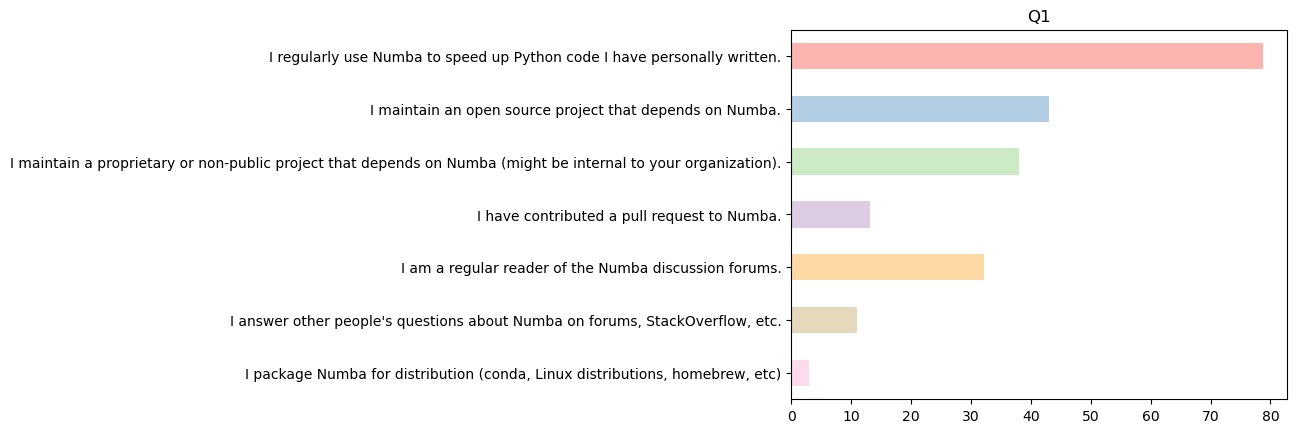

In [11]:
plot_checkbox_question(d1, title="Q1")

# Q2

In [12]:
d2 = extract_data_for_checkbox_question(7, 19)

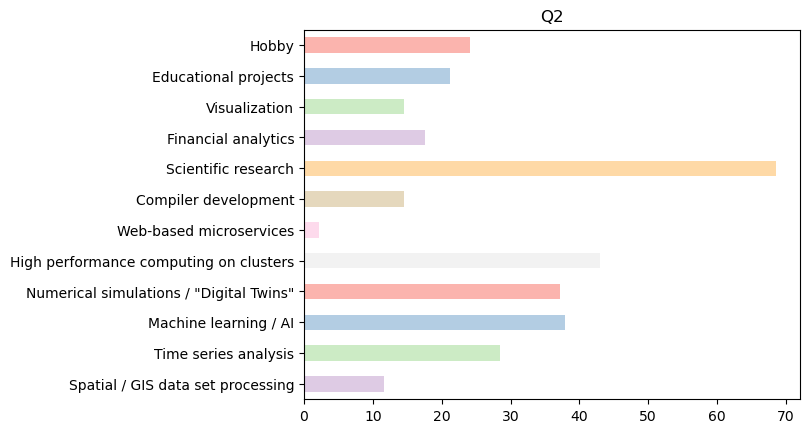

In [13]:
plot_checkbox_question(d2, title="Q2")

# Q3

In [14]:
d3 = extract_data_for_checkbox_question(19, 37)

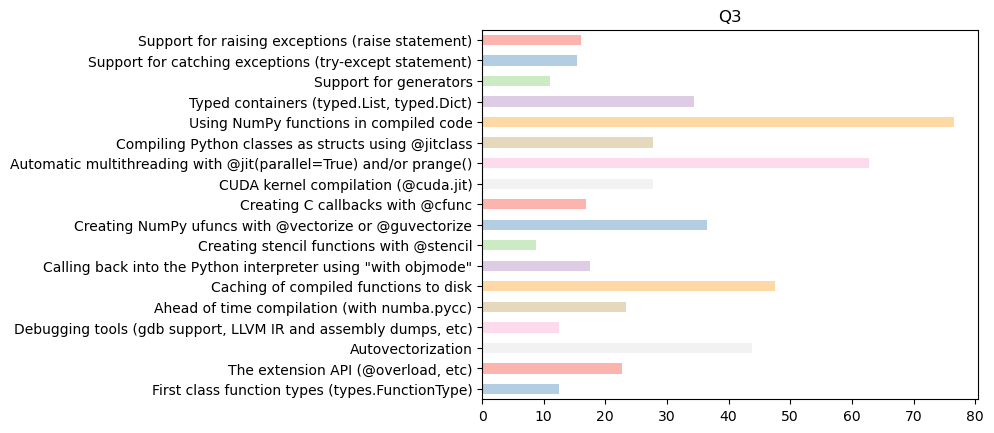

In [15]:
plot_checkbox_question(d3, title="Q3")

# Q4

In [16]:
d4 = extract_data_for_checkbox_question(37, 55)

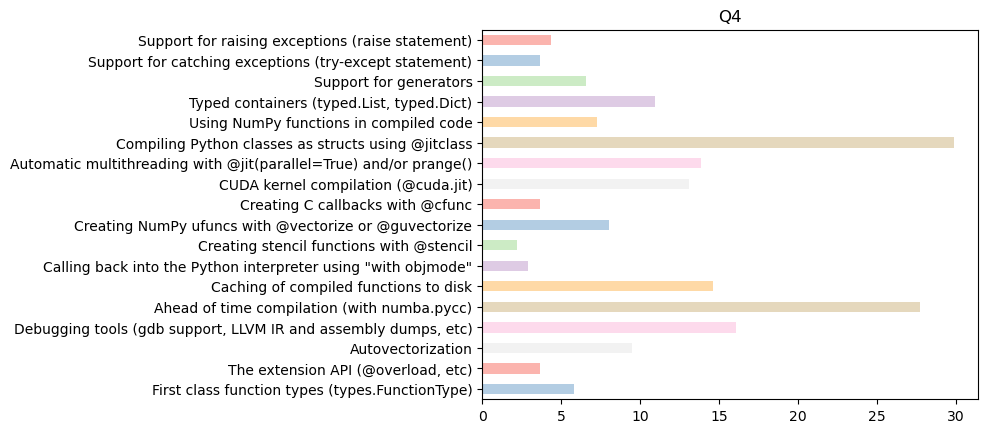

In [17]:
plot_checkbox_question(d4, title="Q4")

# Q5

In [18]:
d5 = extract_data_for_checkbox_question(55, 73)

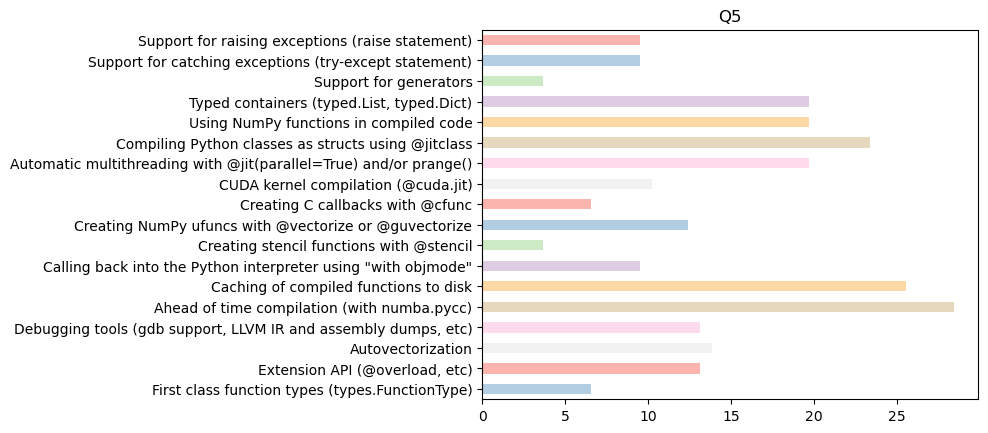

In [19]:
plot_checkbox_question(d5, title="Q5")

# Q6

In [20]:
d6 = extract_data_for_ranking_question(73, 83)

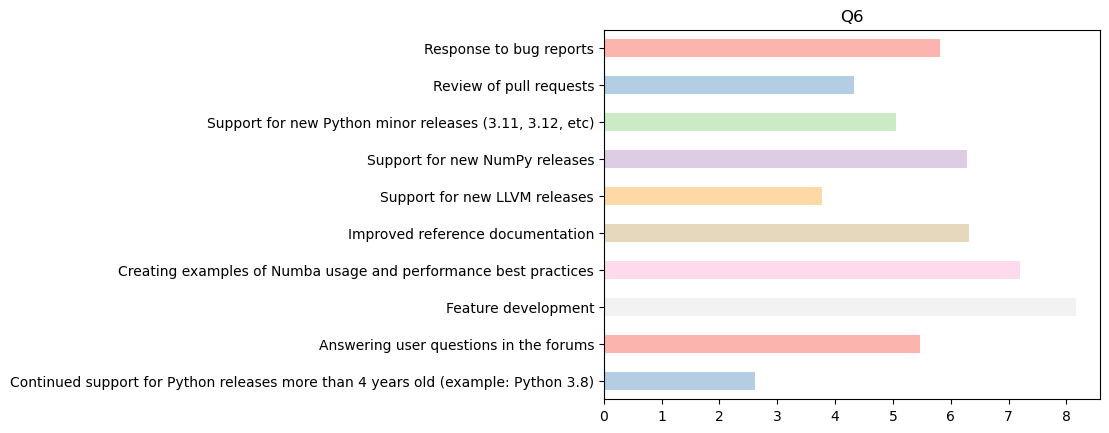

In [21]:
plot_ranking_questions(d6, title="Q6", total_responses=135)

# Q7

In [22]:
d7 = extract_data_for_ranking_question(83, 94)

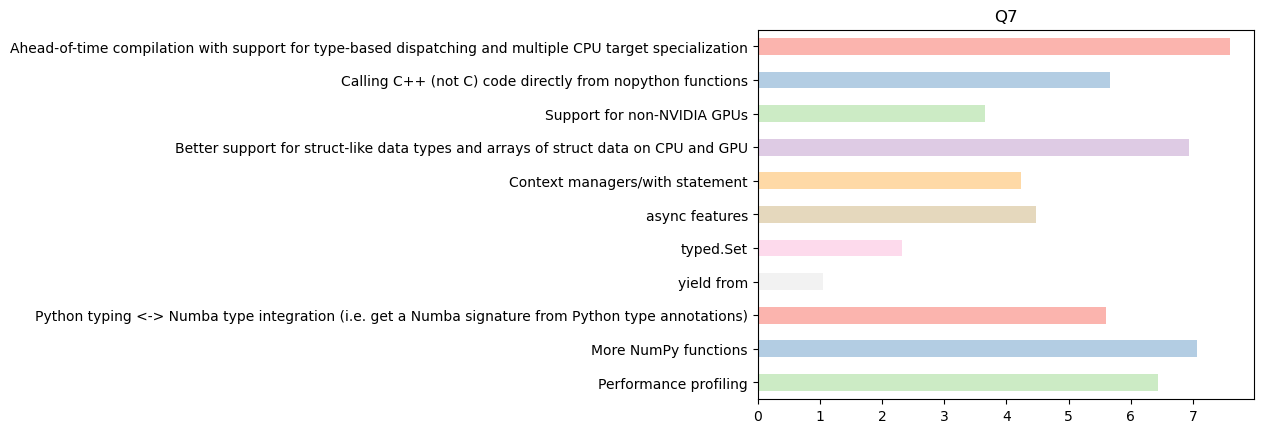

In [23]:
plot_ranking_questions(d7, title="Q7", total_responses=135)

# Q8

In [24]:
df[df.columns[94]].iloc[1:].replace(to_replace=["Yes", "No"], value=[1, 0]).sum()

10

# Q9

In [25]:
d9 = extract_data_for_checkbox_question(96, 100).astype(int)
d9.sum()

Learning about compilers                            4
Compiler research                                   4
Building Python compilers (other than Numba)        5
Building non-Python or domain specific compilers    5
dtype: int64

# Q10

In [26]:
d10 = extract_data_for_checkbox_question(100, 107)

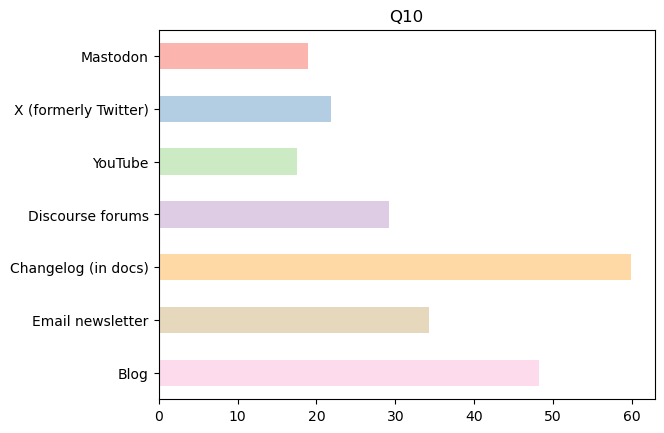

In [27]:
plot_checkbox_question(d10, title="Q10")